# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


# Loading Data


In [2]:
data = pd.read_csv("C:/Users/pushk/Downloads/data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing

In [5]:
data=data.dropna()
print("Shape of the data : ", data.shape)

Shape of the data :  (699, 2)


# Splitting Data

In [6]:
# training input and output 
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# Validatind data input and output

test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)


In [7]:
print(f"Train input data shape =  {train_input.shape}")
print(f"Train output data shape =  {train_output.shape}")
print(f"Test input data shape =  {test_input.shape}")
print(f"Test output data shape =  {test_output.shape}")



Train input data shape =  (500, 1)
Train output data shape =  (500, 1)
Test input data shape =  (199, 1)
Test output data shape =  (199, 1)


# <font color = "green">Linear Regression </font>

# Forward Propogation 

f(x) = mx + C

In [34]:
def forward_propogation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Cost Function

summition(1/2n*(y-f(x))^2)

In [35]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# Gradient Descent

df = f(x) - y

dm = df*x

dc = df*1

In [36]:
def gradient_descent(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Updating Parameters

m = m - learning_rate*dm


c = c - learning_rate*dc

In [37]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Model Training

In [40]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) 
    parameters["c"] = np.random.uniform(0,1) 
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propogation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = gradient_descent(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, Loss = 146.2320527791122


<Figure size 432x288 with 0 Axes>

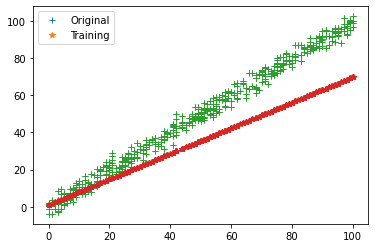

Iteration = 2, Loss = 68.58054569842622


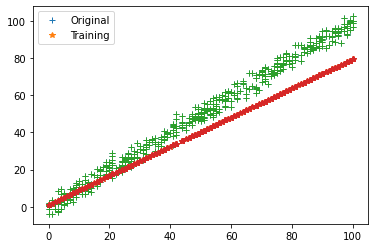

Iteration = 3, Loss = 33.34996595527845


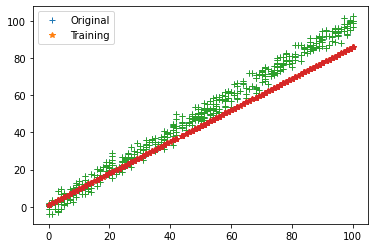

Iteration = 4, Loss = 17.365807932589473


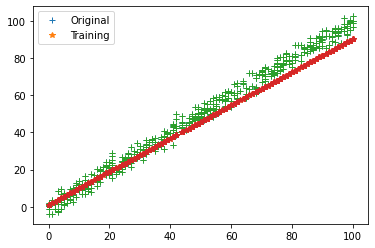

Iteration = 5, Loss = 10.11377276285295


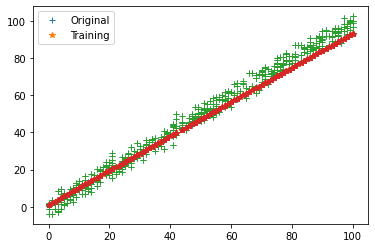

Iteration = 6, Loss = 6.823511403810507


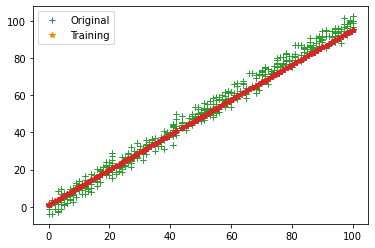

Iteration = 7, Loss = 5.330711211154241


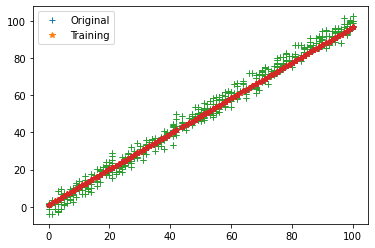

Iteration = 8, Loss = 4.653421140879809


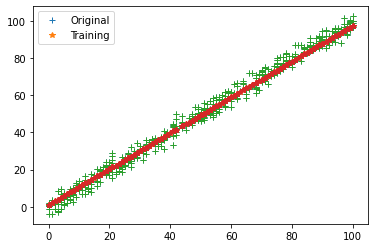

Iteration = 9, Loss = 4.346128916672951


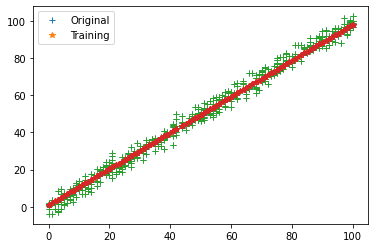

Iteration = 10, Loss = 4.206705125302128


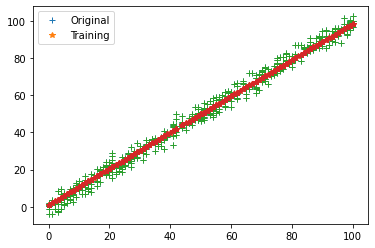

Iteration = 11, Loss = 4.1434434280973145


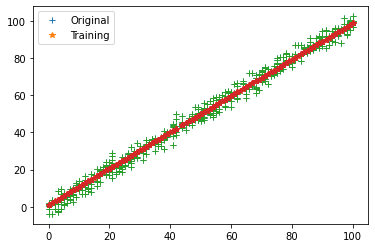

Iteration = 12, Loss = 4.1147365576261725


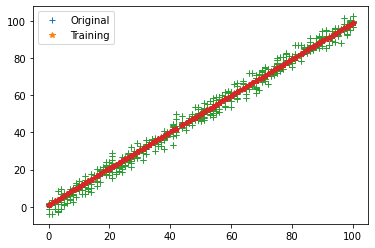

Iteration = 13, Loss = 4.101707250568727


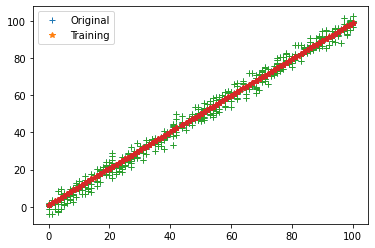

Iteration = 14, Loss = 4.095790871647446


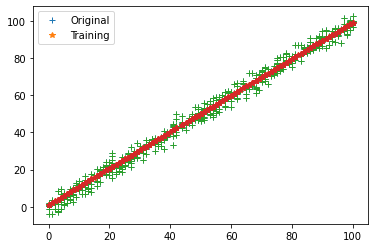

Iteration = 15, Loss = 4.093101636350369


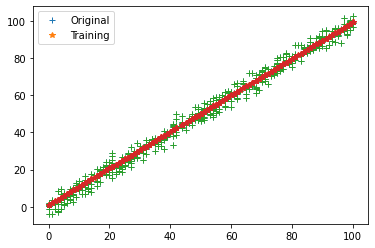

Iteration = 16, Loss = 4.091876559940345


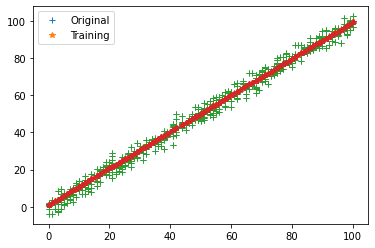

Iteration = 17, Loss = 4.091315774289361


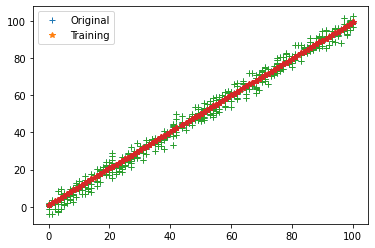

Iteration = 18, Loss = 4.091056378341763


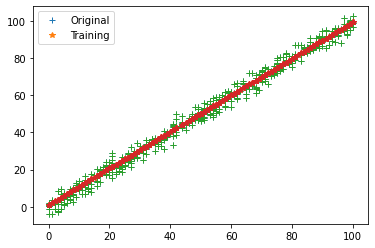

Iteration = 19, Loss = 4.090933723486619


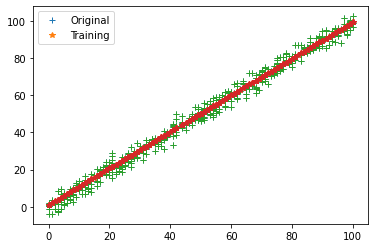

Iteration = 20, Loss = 4.090873108466766


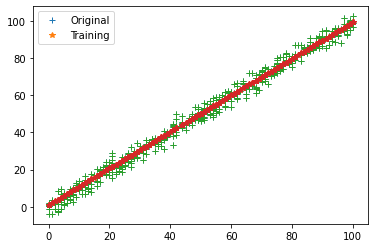

In [41]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [43]:
print(parameters)

{'m': 0.9827672014081683, 'c': 0.9608938617735434}


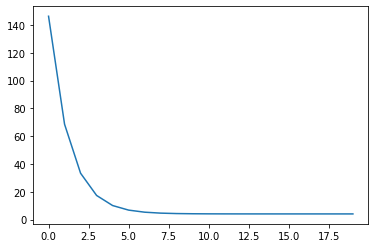

In [46]:
plt.plot(loss)

# Prediction

In [47]:
test_predictions = test_input * parameters["m"] + parameters["c"]

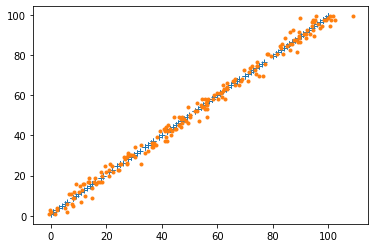

In [49]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_output, test_predictions, ".")
plt.show()


In [50]:
cost_function(test_output,test_input)

3.9585243075824548